# Capstone Project 2 : Transjakarta

```Optimizing & Improving Revenue and Services on Transjakarta by Revenue and Demographic Analysis```

Import Library

In [81]:
import pandas as pd
import numpy as np

## Visualisasi
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load Dataset Transjakarta

In [82]:
df = pd.read_csv('Transjakarta.csv')
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


Informasi Dataset   

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

Berdasarkan info diatas, kita mendapatkan info tentang tipe data masing-masing kolom. Juga dengan jumlah baris dan kolom dalam dataset Transjakarta

Jumlah Baris: 37,900 entries

Jumlah Kolom: 22 column

Informasi Statistik Deskriptif Dataset Transjakarta

In [84]:
display(df.describe(), df.describe(include='object'))


,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-04 16:42:38,P00016,BKN,2023-04-07 19:44:04
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [85]:
list_item = []
for col in df.columns:
    list_item.append([col,df[col].nunique(),df[col].unique()])

tabel_desc = pd.DataFrame(columns=['Nama Kolom','Jumlah Unique Value','Unique Values'],data=list_item)
tabel_desc

,Nama Kolom,Jumlah Unique Value,Unique Values
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095..."
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 199..."
6,corridorID,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q..."
7,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
8,direction,2,"[1.0, 0.0]"
9,tapInStops,2570,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."


Berikut summary dari seluruh kolom dalam dataset, ini digunakan untuk mengetahui nilai unik (unique values) dari setiap kolom dengan cara menggunakan tabel_desc.

In [86]:
pd.DataFrame(
    {'Nama': df.columns,
     'Tipe': df.dtypes,
     'Number of Unique': df.nunique(),
     'NaN' : df.isna().sum(),
     'NaN (%)': df.isna().mean() * 100,
     'Sample': [df[col].unique() for col in df.columns]}
)

,Nama,Tipe,Number of Unique,NaN,NaN (%),Sample
transID,transID,object,37900,0,0.000000,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
payCardID,payCardID,int64,2000,0,0.000000,"[180062659848800, 4885331907664776, 4996225095..."
payCardBank,payCardBank,object,6,0,0.000000,"[emoney, dki, flazz, online, brizzi, bni]"
payCardName,payCardName,object,1993,0,0.000000,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."
payCardSex,payCardSex,object,2,0,0.000000,"[M, F]"
payCardBirthDate,payCardBirthDate,int64,67,0,0.000000,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 199..."
corridorID,corridorID,object,221,1257,3.316623,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q..."
corridorName,corridorName,object,216,1930,5.092348,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
direction,direction,float64,2,0,0.000000,"[1.0, 0.0]"
tapInStops,tapInStops,object,2570,1213,3.200528,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."


Secara keseluruhan, hasil eksplorasi awal menunjukkan bahwa:

Dataset Transjakarta terdiri dari 22 kolom dan 37.900 baris.

Data yang digunakan mencakup periode 1 April 2023 hingga 30 April 2023.

Beberapa kolom masih memiliki nilai kosong yang ditandai sebagai NaN, dan akan memerlukan proses data cleansing pada tahap berikutnya.

Tipe data pada masing-masing kolom juga telah ditinjau. Kolom tapInTime dan tapOutTime masih berupa tipe object sehingga perlu dikonversi menjadi Data Time, sisanya kolom lainnya sudah sesuai.

Berdasarkan struktur dataset, sebagian besar analisis nantinya akan melibatkan data kategorikal.

Melalui tabel describe, terlihat bahwa nilai minimum dan maksimum berada dalam rentang yang wajar, sehingga tidak ditemukan indikasi anomali atau outlier.

Dari tabel unique, dapat diamati jumlah nilai unik dari setiap variabel. Terdapat ketidaksesuaian antara jumlah nilai unik corridorID dan corridorName, padahal keduanya semestinya memiliki jumlah kategori yang sama. Hal ini menunjukkan perlunya penanganan lebih lanjut untuk memastikan konsistensi data.

# Data Cleansing


Mengecek duplicates pada csv Transjakarta

In [87]:
total_duplicates = df.duplicated().sum()

if total_duplicates > 0:
    print("\nTotal nilai yang merupakan duplikat dalam DataFrame:", total_duplicates)
else:
    print("\nTidak ada data duplikat dalam DataFrame.")



Tidak ada data duplikat dalam DataFrame.


# Menghitung missing values

In [88]:
missing_values = df.isnull().sum()

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': (missing_values / len(df)) * 100
})

missing_info_filtered = missing_info[missing_info['Missing Count'] > 0]

print("Informasi Missing Values:")
print(missing_info_filtered)

print("\nTotal Missing Percentage:", missing_info['Missing Percentage (%)'].sum())


Informasi Missing Values:
                 Missing Count  Missing Percentage (%)
corridorID                1257                3.316623
corridorName              1930                5.092348
tapInStops                1213                3.200528
tapOutStops               2289                6.039578
tapOutStopsName           1344                3.546174
tapOutStopsLat            1344                3.546174
tapOutStopsLon            1344                3.546174
stopEndSeq                1344                3.546174
tapOutTime                1344                3.546174
payAmount                 1007                2.656992

Total Missing Percentage: 38.03693931398417


# Penjelasan Dataset Transjakarta

Transjakarta.csv
1.	```transID```: Unique transaction id for every transaction
2.	```payCardID```: Customers main identifier. The card customers use as a ticket for entrance and exit.
3.	```payCardBank```: Customers card bank issuer name
4.	```payCardName```: Customers name that is embedded in the card.
5.	```payCardSex```: Customers sex that is embedded in the card
6.	```payCardBirthDate```: Customers birth year
7.	```corridorID```: Corridor ID / Route ID as key for route grouping.
8.	```corridorName```: Corridor Name / Route Name contains Start and Finish for each route.
9.	```direction```: 0 for Go, 1 for Back. Direction of the route.
10.	```tapInStops```: Tap In (entrance) Stops ID for identifying stops name
11.	```tapInStopsName```: Tap In (entrance) Stops Name where customers tap in.
12.	```tapInStopsLat```: Latitude of Tap In Stops
13.	```tapInStopsLon```: Longitude of Tap In Stops
14.	```stopStartSeq```: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
15.	```tapInTime```: Time of tap in. Date and time
16.	```tapOutStops```: Tap Out (Exit) Stops ID for identifying stops name
17.	```tapOutStopsName```: Tap out (exit) Stops Name where customers tap out.
18.	```tapOutStopsLat```: Latitude of Tap Out Stops
19.	```tapOutStopsLon```: Longitude of Tap Out Stops
20.	```stopEndSeq```: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.
21.	```tapOutTime```: Time of tap out. Date and time
22.	```payAmount```: The number of what customers pay. Some are free. Some not.


Sebagaimana yang tertera pada info diatas, dapat disimpulkan bahwa:

Kolom ```tapInTime``` dan ```tapOutTime``` berisikan waktu dari tap masuk dan tap keluar halte memiliki tipe data object seharusnya merupakan data datetime

Kolom ```direction``` berisikan value 0 dan 1, dari penjelasannya value tersebut menggambarkan arah rute dari pengguna TransJakarta. Agar lebih mempermudah pemahaman, akan dilakukan perubahan pada value 0 untuk pergi dan 1 untuk pulang

Copy  Data Original


In [89]:
df_cleansing = df.copy()
df_cleansing

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


Mengubah tipe data tanggal menjadi datetime



In [90]:
df_cleansing['tapInTime'] = pd.to_datetime(df['tapInTime'])
df_cleansing['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

Mengambil informasi jam (hour) saja dari kolom waktu tapInTime dan tapOutTime.

In [91]:
df_cleansing['tapInHour'] = df_cleansing['tapInTime'].dt.hour
df_cleansing['tapOutHour'] = df_cleansing['tapOutTime'].dt.hour


Mengambil hari dalam bentuk angka (0–6) dari kolom datetime tapInTime 0-6 = Senin-Minggu

In [92]:
df_cleansing['tapInDay'] = df_cleansing['tapInTime'].dt.dayofweek


In [93]:
tapInDay = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}
df_cleansing['tapInDay'] = df_cleansing['tapInDay'].map(tapInDay)


Modifikasi kolom direction


In [94]:
df_cleansing['direction'] = df_cleansing['direction'].replace({0: 'Keberangkatan', 1: 'Kedatangan'})


Kolom urutan tanggal


In [95]:
df_cleansing["OrderDate"] =df_cleansing['tapOutTime'].dt.strftime('%d')


Menambah kolom umur 

In [96]:
df_cleansing['age'] = 2023 - df_cleansing['payCardBirthDate']


Kategori Usia


In [97]:
bins = [0, 13, 20, 60, float('inf')]
labels = ['Child', 'Teenagers', 'Adult', 'Elderly']

df_cleansing['generation'] = pd.cut(df_cleansing['age'], bins=bins, labels=labels, right=False)


In [98]:
df_cleansing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        36643 non-null  object        
 7   corridorName      35970 non-null  object        
 8   direction         37900 non-null  object        
 9   tapInStops        36687 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

In [99]:
df_cleansing

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDay,OrderDate,age,generation
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,Kedatangan,P00142,...,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6.0,Monday,03,15,Teenagers
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Keberangkatan,B01963P,...,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6.0,Monday,03,26,Adult
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,Keberangkatan,B00499P,...,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6.0,Monday,03,31,Adult
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Keberangkatan,B05587P,...,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6.0,Monday,03,45,Adult
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,Keberangkatan,P00239,...,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6.0,Monday,03,41,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,Kedatangan,P00261,...,106.82365,13.0,2023-04-21 19:55:49,3500.0,18,19.0,Friday,21,19,Teenagers
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,Kedatangan,P00064,...,106.88634,2.0,2023-04-18 22:28:22,3500.0,21,22.0,Tuesday,18,49,Adult
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,Kedatangan,B02873P,...,106.89628,14.0,2023-04-04 13:27:25,20000.0,10,13.0,Tuesday,04,47,Adult
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,Kedatangan,B02505P,...,106.81135,34.0,2023-04-15 20:27:50,0.0,19,20.0,Saturday,15,47,Adult


Delete symbols pada CorridorID

In [100]:
df_cleansing['corridorID'] = df_cleansing['corridorID'].str.replace('.','')

# Missing Value pada ```corridorID``` dan ```corridorName```.


Pada csv Transjakarta terdapat missing values pada ```corridorID``` dan ```corridorName```.

Karena kedua kolom tersebut saling berkaitan, kita dapat memanfaatkan hubungan tersebut untuk mengisi nilai yang hilang. Jika CorridorName kosong, nilainya akan dilengkapi berdasarkan CorridorID, dan sebaliknya — jika CorridorID yang kosong, kita isi menggunakan informasi dari CorridorName.

In [101]:
# Isi corridorName berdasarkan corridorID
df_cleansing["corridorName"] = df_cleansing.groupby("corridorID")["corridorName"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

# Isi corridorID berdasarkan corridorName
df_cleansing["corridorID"] = df_cleansing.groupby("corridorName")["corridorID"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

# Kalau masih ada NA, isi dengan mode global
df_cleansing["corridorID"] = df_cleansing["corridorID"].fillna(df_cleansing["corridorID"].mode()[0])
df_cleansing["corridorName"] = df_cleansing["corridorName"].fillna(df_cleansing["corridorName"].mode()[0])


Missing Value Pada CorridorID & CorridorName

In [102]:
df_cleansing[['corridorID', 'corridorName']].isna().sum()


corridorID      0
corridorName    0
dtype: int64

Sekarang corridorID dan corridorName sudah tidak ada missing Values lagi.

# Missing Values pada ```tapOutStops```  & ```TapOutStopsName```

tapOutStops yang kosong akan diisi menggunakan data tapOutStopName karena 2 kolom ini saling represent satu sama lain

In [103]:
# Isi tapOutStopsName berdasarkan tapOutStops
df_cleansing["tapOutStopsName"] = df_cleansing.groupby("tapOutStops")["tapOutStopsName"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

# Isi tapOutStops berdasarkan tapOutStopsName
df_cleansing["tapOutStops"] = df_cleansing.groupby("tapOutStopsName")["tapOutStops"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

# Kalau masih ada NA, isi dengan mode global
df_cleansing["tapOutStops"] = df_cleansing["tapOutStops"].fillna(df_cleansing["tapOutStops"].mode()[0])
df_cleansing["tapOutStopsName"] = df_cleansing["tapOutStopsName"].fillna(df_cleansing["tapOutStopsName"].mode()[0])


In [104]:
df_cleansing[['tapOutStops', 'tapOutStopsName']].isna().sum()


tapOutStops        0
tapOutStopsName    0
dtype: int64

Sekarang ```corridorID``` dan ```corridorName``` sudah tidak ada missing Values lagi.


# Missing Values ```tapInStops``` & ```tapInStopsName``` yang kosong


In [105]:
# Isi tapInStopsName berdasarkan tapInStops
df_cleansing["tapInStopsName"] = df_cleansing.groupby("tapInStops")["tapInStopsName"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

# Isi tapInStops berdasarkan tapInStopsName
df_cleansing["tapInStops"] = df_cleansing.groupby("tapInStopsName")["tapInStops"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

# Isi NA dengan mode global
df_cleansing["tapInStops"] = df_cleansing["tapInStops"].fillna(df_cleansing["tapInStops"].mode()[0])
df_cleansing["tapInStopsName"] = df_cleansing["tapInStopsName"].fillna(df_cleansing["tapInStopsName"].mode()[0])

In [106]:
df_cleansing[['tapInStops', 'tapInStopsName']].isna().sum()


tapInStops        0
tapInStopsName    0
dtype: int64

Sekarang ```tapInStops``` dan ```tapInStopsName``` sudah tidak ada missing Values lagi.


Pengecekan kembali missing value agar mudah mengetahui apa saja yang perlu di cleansing

In [107]:
def missing_report(df):
    missing_values = df.isnull().sum()
    missing_info = pd.DataFrame({
        'Missing Count': missing_values,
        'Missing Percentage (%)': (missing_values / len(df)) * 100
    })
    missing_info_filtered = missing_info[missing_info['Missing Count'] > 0]

    total_cells = df.size
    total_missing = df.isnull().sum().sum()
    total_missing_percentage = (total_missing / total_cells) * 100
    
    return missing_info_filtered, total_missing_percentage

report, total_percent = missing_report(df_cleansing)
print(report)
print("\nTotal Missing Percentage (overall):", total_percent)


                Missing Count  Missing Percentage (%)
tapOutStopsLat           1344                3.546174
tapOutStopsLon           1344                3.546174
stopEndSeq               1344                3.546174
tapOutTime               1344                3.546174
payAmount                1007                2.656992
tapOutHour               1344                3.546174
OrderDate                1344                3.546174

Total Missing Percentage (overall): 0.854787033546928


# Missing Values ```tapOutStopsLat``` dan ```tapOutStopsLon``` 

Nilai kosong pada ```tapOutStopsLat``` dan ```tapOutStopsLon``` akan diisi menggunakan data dari ```tapOutStopsName``` karena ketiga kolom tersebut merepresentasikan lokasi halte yang sama.

In [108]:
# Mapping berdasarkan TapOutStopsName yang lengkap
stop_mapping = (
    df_cleansing.dropna(subset=["tapOutStopsLat", "tapOutStopsLon"])
                .drop_duplicates("tapOutStopsName")
                .set_index("tapOutStopsName")[["tapOutStopsLat", "tapOutStopsLon"]]
)

# Isi missing lat/lon berdasarkan stopMapping
df_cleansing["tapOutStopsLat"] = df_cleansing["tapOutStopsName"].map(stop_mapping["tapOutStopsLat"])
df_cleansing["tapOutStopsLon"] = df_cleansing["tapOutStopsName"].map(stop_mapping["tapOutStopsLon"])

# Jika masih ada NaN → isi dengan mode global (fallback)
df_cleansing["tapOutStopsLat"] = df_cleansing["tapOutStopsLat"].fillna(df_cleansing["tapOutStopsLat"].mode()[0])
df_cleansing["tapOutStopsLon"] = df_cleansing["tapOutStopsLon"].fillna(df_cleansing["tapOutStopsLon"].mode()[0])


setiap tapOutStopsName selalu memiliki pasangan koordinat latitude dan longitude yang konsisten, sehingga baris lain yang memiliki halte sama tetapi koordinatnya kosong bisa dilengkapi berdasarkan data yang sudah lengkap.

Untuk nilai yang kosong setelah proses pemetaan (jika ada), maka koordinat akan diisi menggunakan nilai yang paling umum (mode) sebagai pengaman terakhir agar tidak ada lagi nilai NaN yang tersisa.

In [109]:
df_cleansing[['tapOutStopsLat', 'tapOutStopsLon']].isna().sum()


tapOutStopsLat    0
tapOutStopsLon    0
dtype: int64

# Missing Values – ```PayAmount```

Kolom ```PayAmount``` berisi nilai uang yang dibayarkan oleh penumpang (dalam rupiah). Sebagai variabel numerik penting dalam analisis transaksi, nilai kosong pada kolom ini harus ditangani agar tidak mengganggu proses analisis atau pemodelan.

In [110]:
df_cleansing['payAmount'].value_counts()


payAmount
3500.0     18503
0.0        16648
20000.0     1742
Name: count, dtype: int64

Strategi Penanganan Missing Value
 menggunakan tarif standar Transjakarta

Karena sistem Transjakarta biasanya memiliki tarif flat, nilai PayAmount dapat diisi dengan nilai tarif standar, yaitu sebesar Rp 3.500

Pada halnya tarif sbb:

Rp 0 terjadi karena kasus free ride 
Rp 20.000 untuk Transjakarta berlaku untuk layanan Royaltrans pada rute-rute tertentu seperti Bintaro, Cibubur

In [111]:
df_cleansing['payAmount'] = df_cleansing['payAmount'].fillna(3500)


In [112]:
df_cleansing['payAmount'].isna().sum()


np.int64(0)

Pengecekan kembali Missing Value

In [113]:
df_cleansing.isna().sum()


transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq          1344
tapOutTime          1344
payAmount              0
tapInHour              0
tapOutHour          1344
tapInDay               0
OrderDate           1344
age                    0
generation             0
dtype: int64

# Missing Value ```stopEndSeq```

Karena ```stopEndSeq``` koord langsung dengan ```tapOutStopsName```, maka bisa dibuat mapping seperti lat/lon.

In [114]:
# Mapping berdasarkan TapOutStopsName yang sudah lengkap
stop_seq_mapping = (
    df_cleansing.dropna(subset=["stopEndSeq"])
                .drop_duplicates("tapOutStopsName")
                .set_index("tapOutStopsName")["stopEndSeq"]
)

# Isi missing stopEndSeq berdasarkan nama halte
df_cleansing["stopEndSeq"] = df_cleansing["tapOutStopsName"].map(stop_seq_mapping)

# Fallback → isi NA dengan mode
df_cleansing["stopEndSeq"] = df_cleansing["stopEndSeq"].fillna(df_cleansing["stopEndSeq"].mode()[0])


In [115]:
df_cleansing['stopEndSeq'].isna().sum()


np.int64(0)

# Missing Value ```tapOutTime``` & ```tapOutHour```

Karena ```tapOutTime``` & ```tapOutHour``` masih kosong, ini akan diisi dengan median waktu

In [116]:
df_cleansing["tapOutTime"] = df_cleansing["tapOutTime"].fillna(df_cleansing["tapOutTime"].median())


In [117]:
df_cleansing["tapOutHour"] = df_cleansing["tapOutHour"].fillna(df_cleansing["tapOutHour"].mode()[0])


Diisi menggunakan median waktu karena data waktu kedatangan penumpang TransJakarta biasanya tidak merata sepanjang hari menjadikan distribusinya skewed (miring), bukan normal.

Median jauh lebih stabil terhadap distribusi miring dan tetap berada di titik tengah yang natural.




# Missing Value ```OrderDate```

NaN pada ```OrderDate```  diisi dengan median karena kolom ini hanya berisi nomor tanggal (1–31) yang berasal dari ```tapOutTime```

In [118]:
#  Ubah OrderDate ke integer
df_cleansing["OrderDate"] = df_cleansing["OrderDate"].astype(float)

# isi missing dengan median
df_cleansing["OrderDate"] = df_cleansing["OrderDate"].fillna(df_cleansing["OrderDate"].median())


```OrderDate``` tidak sensitif terhadap variasi nilai, sehingga memilih nilai tengah (median) akan menghasilkan tanggal yang tetap wajar dan tidak merusak pola distribusi transaksi bulanan mengingat Dataset ini hanyalah pada 2023 bulan april

In [119]:
df_cleansing.isna().sum()


transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
tapInHour           0
tapOutHour          0
tapInDay            0
OrderDate           0
age                 0
generation          0
dtype: int64

Tidak ada lagi missing value pada dataset Transjakarta

# Penyimpanan Data Cleansing ke CSV dan Excel

Menyimpan dataset yang sudah di cleaning dengan nama TransjakartaCleansing ke CSV & Excel


In [120]:
df_cleansing.to_excel('TransjakartaCleansing.xlsx', index=False)


In [121]:
df_cleansing.to_csv('TransjakartaCleansing.csv', index=False)


# Transjakarta Data Analysis


# Payment Behavior & Card Usage Analysis


1.	Bagaimana demografi pelanggan Transjakarta serta penggunaan kartu pembayaran customer yang potensial untuk ditingkatkan


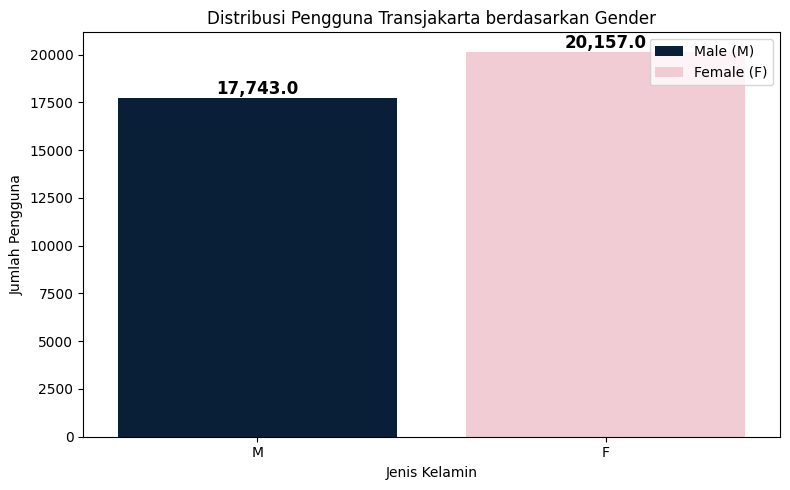

In [137]:

plt.figure(figsize=(8, 5))

plots1 = sns.countplot(
    x='payCardSex',
    data=df_cleansing,
    palette=['#001f3f', '#f7c6d0']
)

plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Pengguna Transjakarta berdasarkan Gender')
plt.legend(['Male (M)', 'Female (F)'], loc='upper right')

# --- Menambahkan nilai jumlah (count) di atas tiap bar ---
for p in plots1.patches:
    height = p.get_height()
    plots1.annotate(
        f'{height:,}',                      # angka dengan format ribuan
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


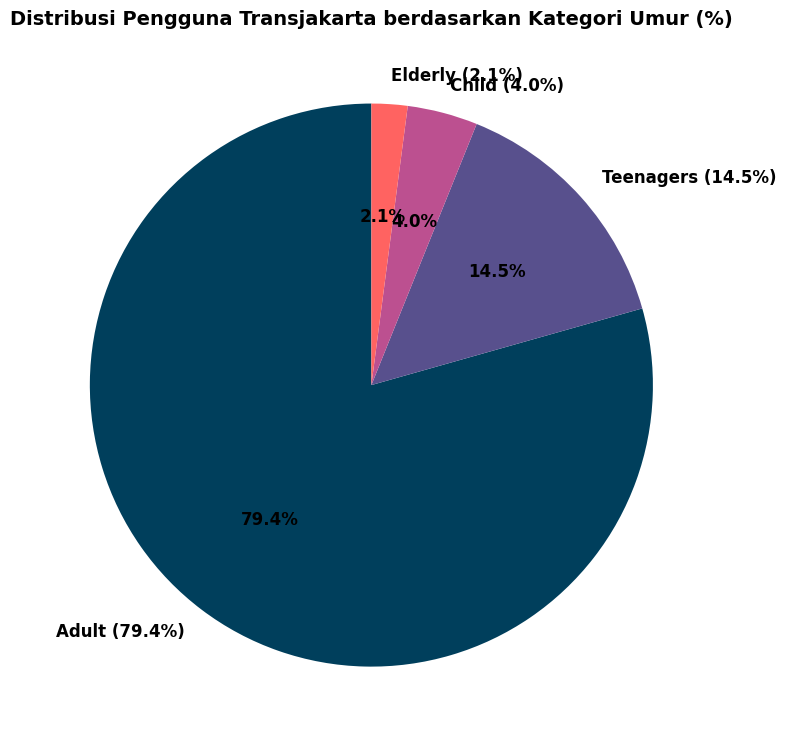

In [138]:

# Jumlah per kategori umur
gen_counts = df_cleansing['generation'].value_counts().sort_values(ascending=False)

# Persentase
percentages = gen_counts / gen_counts.sum() * 100

# Warna pie chart
colors = ['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']

# Plot pie chart
plt.figure(figsize=(8,8))

plt.pie(
    gen_counts,
    labels=[f"{label} ({p:.1f}%)" for label, p in zip(gen_counts.index, percentages)],
    autopct='%1.1f%%',     # menampilkan persen otomatis
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

plt.title(
    'Distribusi Pengguna Transjakarta berdasarkan Kategori Umur (%)',
    fontsize=14,
    fontweight='bold'
)

plt.tight_layout()
plt.show()


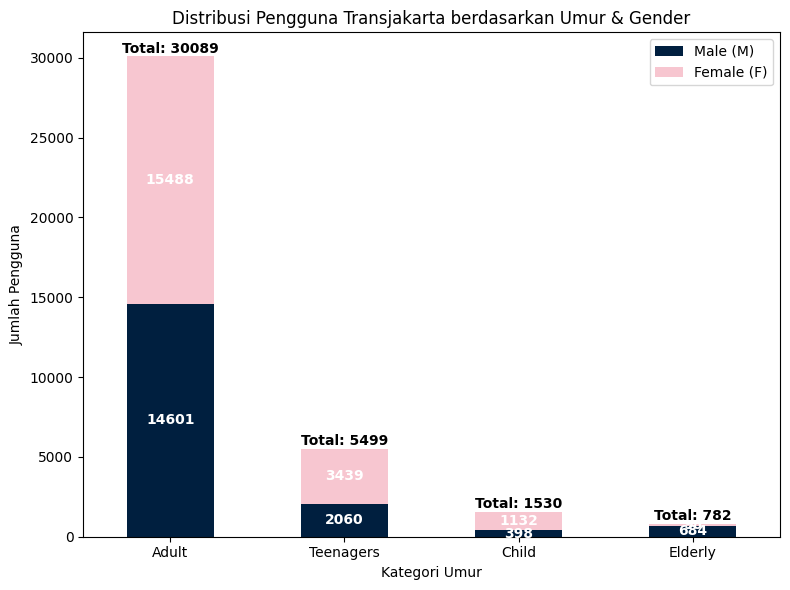

In [139]:
import matplotlib.pyplot as plt
import pandas as pd

# Hitung jumlah per kombinasi age + gender
age_gender_counts = df_cleansing.groupby(['generation', 'payCardSex']).size().reset_index(name='counts')

# Pivot data agar bisa digunakan untuk stacked bar
pivot_df_cleansing = age_gender_counts.pivot(index='generation', columns='payCardSex', values='counts').fillna(0)

# Tambahkan kolom total untuk sorting
pivot_df_cleansing['total'] = pivot_df_cleansing.sum(axis=1)

# Urutkan dari total tertinggi ke terendah
pivot_df_cleansing = pivot_df_cleansing.sort_values('total', ascending=False)

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(8,6))
colors = ['#001f3f', '#f7c6d0']  # Male, Female

pivot_df_cleansing[['M','F']].plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=ax
)

plt.title('Distribusi Pengguna Transjakarta berdasarkan Umur & Gender')
plt.xlabel('Kategori Umur')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=0)
plt.legend(['Male (M)', 'Female (F)'], loc='upper right')

# Tambahkan total per kategori umur
for i, idx in enumerate(pivot_df_cleansing.index):
    male = pivot_df_cleansing.loc[idx, 'M']
    female = pivot_df_cleansing.loc[idx, 'F']
    total = male + female

    ax.text(i, male/2, f'{int(male)}', ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    ax.text(i, male + female/2, f'{int(female)}', ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    ax.text(i, total + 50, f'Total: {int(total)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


Insight: 

1. Adult (Dewasa) – Pengguna Terbanyak

Total: 30.089 pengguna 
Male: ± 14.601 
Female: ± 15.488

Kelompok usia dewasa (20–59 tahun) merupakan mayoritas pengguna. Hal ini menunjukkan bahwa layanan Transjakarta paling banyak digunakan oleh masyarakat usia produktif dan lebih banyak perempuan dibanding lelaki.

2. Teenager (Remaja) 

Total: 5.499 pengguna 
Male: ± 2060 
Female: ± 3439

Remaja (13–19 tahun) menggunakan Transjakarta terutama untuk keperluan sekolah atau kegiatan sehari-hari. Yang mana lagi jenis kelamin pengguna terbanyak adalah perempuan.

3. Child (Anak-anak) 

Total: 1.530 pengguna
Male: ± 398 
Female: ± 1.132 

Anak-anak (<13 tahun) jarang bepergian sendiri, umumnya didampingi orang tua.

4. Elderly (Lansia) – Pengguna Paling Sedikit

Total: 782 pengguna
Male: ± 684 
Female: ± 98

Lansia (≥60 tahun) memiliki mobilitas terbatas dan lebih memilih moda transportasi lain atau perjalanan lebih jarang.

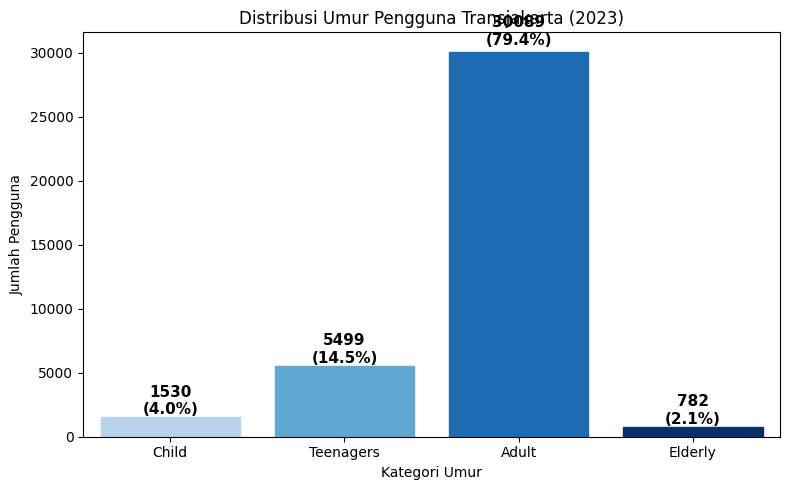

In [140]:

# Jumlah total pengguna
total_users = frekuensi_umur['count'].sum()

plt.figure(figsize=(8,5))

# Barplot dasar
ax = sns.barplot(
    x='generation',
    y='count',
    data=frekuensi_umur,
    color='white'
)

# Gradasi warna
cmap = plt.cm.Blues
colors = cmap(np.linspace(0.3, 1, len(frekuensi_umur)))

# Warna ke masing-masing bar dan tambahkan teks total + persentase
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])
    
    # Letak posisi bar
    height = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2

    # Hitung persentase
    percent = height / total_users * 100

    # Menambahkan teks total dan persentase di atas bar
    ax.text(
        x_pos, height + (height * 0.01),
        f'{int(height)}\n({percent:.1f}%)',  # menampilkan jumlah dan %
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )

plt.title('Distribusi Umur Pengguna Transjakarta (2023)')
plt.xlabel('Kategori Umur')
plt.ylabel('Jumlah Pengguna')
plt.tight_layout()
plt.show()


Berdasarkan hasil visualisasi, terlihat bahwa mayoritas pengguna Transjakarta pada tahun 2023 didominasi oleh kelompok usia Adult (dewasa) dengan penjelasan sebagai berikut :

1. Adult (Dewasa) – 30.089 User

Kelompok ini merupakan user terbanyak, menunjukkan bahwa layanan Transjakarta paling banyak dimanfaatkan oleh masyarakat usia produktif (20–59 tahun). Yang mana juga bisa dilihat secara riil bahwa Transjakarta digunakan untuk kebutuhan mobilitas pekerja, mahasiswa, dan masyarakat umum yang aktif melakukan perjalanan rutin.

2. Teenager (Remaja) – 5.499 User

Remaja berada di posisi kedua. Artinya terdapat penggunaan oleh pelajar SMA, mahasiswa awal, atau remaja lainnya yang menggunakan Transjakarta untuk transportasi sehari harinya untuk berangkat ke sekolah

3. Child (Anak-anak) – 1.530 User

Jumlah pengguna anak-anak relatif kecil. Karena anak-anak umumnya bepergian bersama orang tua atau lebih jarang menggunakan transportasi umum secara mandiri.

4 . Elderly (Lansia) – 782 User

Kelompok lansia menjadi pengguna paling sedikit. Hal ini mungkin disebabkan oleh kebutuhan mobilitas yang lebih terbatas atau preferensi menggunakan moda transportasi lain yang dinilai lebih nyaman atau tidak memerlukan banyaknya pergantian bus.


- Berdasarkan Paycard

Bank atau jenis kartu mana yang paling dominan dipakai? Dan Bank & Jenis kartu mana yang Transjakarta harus tetap pertahankan kerjasamanya dan tingkatkan kerjasamanya?


In [141]:
print("Jumlah Bank Unik:", df_cleansing['payCardBank'].nunique())
print("Jumlah Gender (M/F):")
print(df_cleansing['payCardSex'].value_counts())


Jumlah Bank Unik: 6
Jumlah Gender (M/F):
payCardSex
F    20157
M    17743
Name: count, dtype: int64


Dapat dilihat berdasarkan kartu yang digunakan untuk pembayaran(Paycard) bahwa terdapat 6 jenis Paycard yang digunakan oleh masyarakat untuk pembayaran moda transportasi ini. Dan Jumlah pengguna perempuan lebih banyak dibandingkan laki-laki.

Selisih pengguna:
19.442 – 17.064 = 2.378 penumpang
→ Perempuan sekitar 12,2% lebih banyak daripada laki-laki. 

Perempuan lebih banyak memanfaatkan TransJakarta di periode waktu dan rute tersebut

In [142]:
# Hitung frekuensi bank
bank_counts = (
    df_cleansing['payCardBank']
    .value_counts()
    .reset_index()
)

bank_counts.columns = ['payCardBank', 'count']
bank_counts


,payCardBank,count
0,dki,18743
1,emoney,6866
2,brizzi,3531
3,flazz,3234
4,online,2869
5,bni,2657


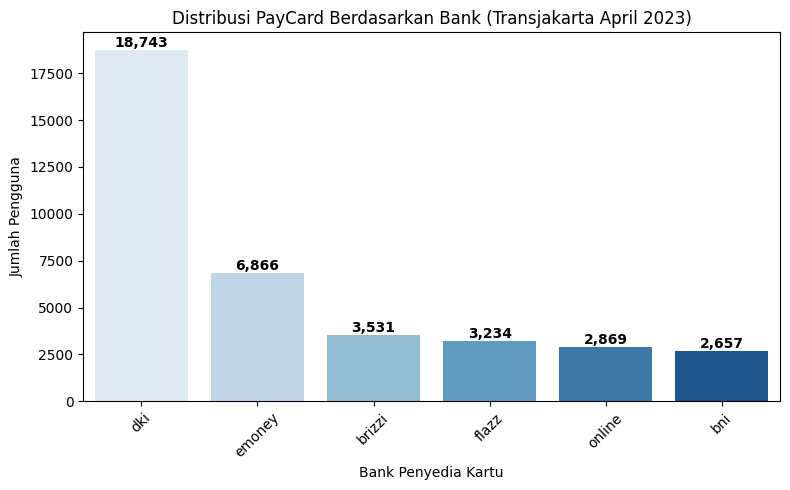

In [143]:

plt.figure(figsize=(8,5))
ax = sns.barplot(data=bank_counts, x='payCardBank', y='count', palette='Blues')

# --- Total distribusi di atas bar ---
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}',
                (p.get_x() + p.get_width()/2, height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')

plt.title('Distribusi PayCard Berdasarkan Bank (Transjakarta April 2023)')
plt.xlabel('Bank Penyedia Kartu')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Dapat dilihat bahwa berdasarkan pola pembayaran transjakarta pengguna terdapat perbedaaan signifikan antara pembayaran menggunakan paycard BankDKI dibanding kartu elektronik lainnya seperti Emoney, Flazz dan lainnya.


In [144]:
print("Jumlah baris df_cleansing:", df_cleansing.shape[0])

user_by_age = (
    df_cleansing
        .groupby(['payCardBank', 'generation'])
        .size()
        .reset_index(name='counts')
)

print(user_by_age)


Jumlah baris df_cleansing: 37900
   payCardBank generation  counts
0          bni      Child     194
1          bni  Teenagers     560
2          bni      Adult    1894
3          bni    Elderly       9
4       brizzi      Child      41
5       brizzi  Teenagers     571
6       brizzi      Adult    2865
7       brizzi    Elderly      54
8          dki      Child     715
9          dki  Teenagers    2337
10         dki      Adult   15210
11         dki    Elderly     481
12      emoney      Child     255
13      emoney  Teenagers    1316
14      emoney      Adult    5211
15      emoney    Elderly      84
16       flazz      Child     150
17       flazz  Teenagers     381
18       flazz      Adult    2606
19       flazz    Elderly      97
20      online      Child     175
21      online  Teenagers     334
22      online      Adult    2303
23      online    Elderly      57


Penjelasan

Kategori Umur:

| Kategori |     Umur    |
| -------- | ----------- |
| Adult    | 20–59 tahun |
| Teenager | 13–19 tahun |
| Child    | <13 tahun   |
| Elderly  | ≥60 tahun   |

Penjelasan per Bank

1. BNI

| Kategori | Jumlah |
| -------- | ------ |
| Adult    | 1.894  |
| Teenager | 560    |
| Child    | 194    |
| Elderly  | 9      |

BNI didominasi oleh dewasa (Adult). Pengguna lansia (Elderly) sangat sedikit. Karena sedikitnya pelanggan yang menggunakan BNI, hal ini harus ditingkatkan.

2. Brizzi (BRI)

| Kategori | Jumlah |
| -------- | ------ |
| Adult    | 2.865  |
| Teenager | 571    |
| Child    | 41     |
| Elderly  | 54     |


Pengguna dewasa sangat dominan.
Child pengguna sangat sedikit untuk kartu Brizzi.

3. Bank DKI (JakCard) - Paling Populer

| Kategori | Jumlah |
| -------- | ------ |
| Adult    | 15.210 |
| Teenager | 2.337  |
| Child    | 715    |
| Elderly  | 481    |


Bank DKI adalah bank dengan pengguna terbanyak di seluruh kategori umur. Sebagai kartu resmi yang umum dipakai untuk fasilitas publik Jakarta, angka pengguna sangat tinggi terutama untuk Dewasa, Pelajar/Remaja. Bahkan kategori Elderly pun paling banyak dibanding bank lain.

Ini menunjukkan JakCard sangat dominan di jaringan Transjakarta.


4. e-Money (Mandiri)

| Kategori | Jumlah |
| -------- | ------ |
| Adult    | 5.211  |
| Teenager | 1.316  |
| Child    | 255    |
| Elderly  | 84     |


Mandiri e-Money banyak digunakan oleh kelompok dewasa, dan cukup banyak juga remaja.

5. Flazz (BCA)

| Kategori | Jumlah |
| -------- | ------ |
| Adult    | 2.606  |
| Teenager | 381    |
| Child    | 150    |
| Elderly  | 97     |



Flazz memiliki distribusi yang cukup seimbang tapi tetap didominasi dewasa. Dapat dilihat kelompok Elderly (97) lebih banyak dibanding Brizzi, eMoney, dan Online.

6. Online Payment (QRIS, e-wallet)

| Kategori | Jumlah |
| -------- | ------ |
| Adult    | 2.303  |
| Teenager | 334    |
| Child    | 175    |
| Elderly  | 57     |


Pembayaran online (QRIS atau aplikasi lain) juga lebih banyak digunakan oleh dewasa. Menariknya: kategori Child (175) cukup tinggi dibanding bank fisik seperti Brizzi dan Flazz — Indikasi:

Anak-anak lebih sering pakai e-wallet milik orang tua/ Orang tua memberikan akses menggunakan e-wallet agar lebih praktis untuk anaknya karena,

Online menggunakan aplikasi membuat itu sebagai pengganti kartu fisik

Summary :

Adult (20–59 tahun) adalah kategori umur yang paling banyak menggunakan semua jenis kartu, dan mendominasi hampir seluruh transaksi.

Bank DKI (JakCard) menjadi kartu paling dominan di semua kelompok usia — mulai dari Child, Teenager, Adult hingga Elderly — menunjukkan bahwa kartu ini adalah pilihan utama pengguna Transjakarta.

Elderly (≥60 tahun) adalah kategori dengan pengguna paling sedikit, namun Bank DKI tetap menjadi kartu yang paling banyak digunakan oleh kelompok ini dibandingkan bank lainnya.

Semua bank menunjukkan pola distribusi yang mirip:
Adult > Teenager > Child/Elderly,
yang berarti mayoritas pengguna Transjakarta berasal dari kelompok usia produktif, disusul remaja, dan terakhir anak-anak serta lansia.

# Revenue Analysis

Dikarenakan Transjakarta mengenakan Tarif, berikut rumusan masalah terkait Revenue

1. Berapa total pendapatan harian pada Bulan April 2023?

2. Apakah pendapatan berhubungan dengan jam sibuk (rush hour)?

3. Rute mana yang memiliki pendapatan tertinggi di Bulan April 2023?

In [130]:

# Pastikan kolom waktu sudah dalam format datetime
df_cleansing["tapInTime"] = pd.to_datetime(df_cleansing["tapInTime"])
df_cleansing["tapOutTime"] = pd.to_datetime(df_cleansing["tapOutTime"])

# Jika belum ada kolom OrderDate, buat dari tapInTime
df_cleansing["OrderDate"] = df_cleansing["tapInTime"].dt.date

# ---------- 1. TOTAL PENDAPATAN HARIAN ----------
df_cleansing["revenue"] = df_cleansing["payAmount"]  # gunakan payAmount sebagai tarif

daily_revenue = (
    df_cleansing.groupby("OrderDate")["revenue"]
    .sum()
    .reset_index(name="total_revenue")
)

print("\n=== TOTAL PENDAPATAN HARIAN ===")
print(daily_revenue)

# ---------- 2. RUTE DENGAN PENDAPATAN



=== TOTAL PENDAPATAN HARIAN ===
     OrderDate  total_revenue
0   2023-04-01        48000.0
1   2023-04-02        21000.0
2   2023-04-03      4434500.0
3   2023-04-04      4441500.0
4   2023-04-05      4434500.0
5   2023-04-06      4427500.0
6   2023-04-07      4448500.0
7   2023-04-08       933500.0
8   2023-04-09       991000.0
9   2023-04-10      4414500.0
10  2023-04-11      4421500.0
11  2023-04-12      4421500.0
12  2023-04-13      5407000.0
13  2023-04-14      5410500.0
14  2023-04-15      1924000.0
15  2023-04-16      1964500.0
16  2023-04-17      5430500.0
17  2023-04-18      5447000.0
18  2023-04-19      5434000.0
19  2023-04-20      4438000.0
20  2023-04-21      4442500.0
21  2023-04-22      1030500.0
22  2023-04-23       851500.0
23  2023-04-24      4411000.0
24  2023-04-25      4418000.0
25  2023-04-26      4481500.0
26  2023-04-27      4434500.0
27  2023-04-28      4428500.0
28  2023-04-29       734000.0
29  2023-04-30      1000000.0


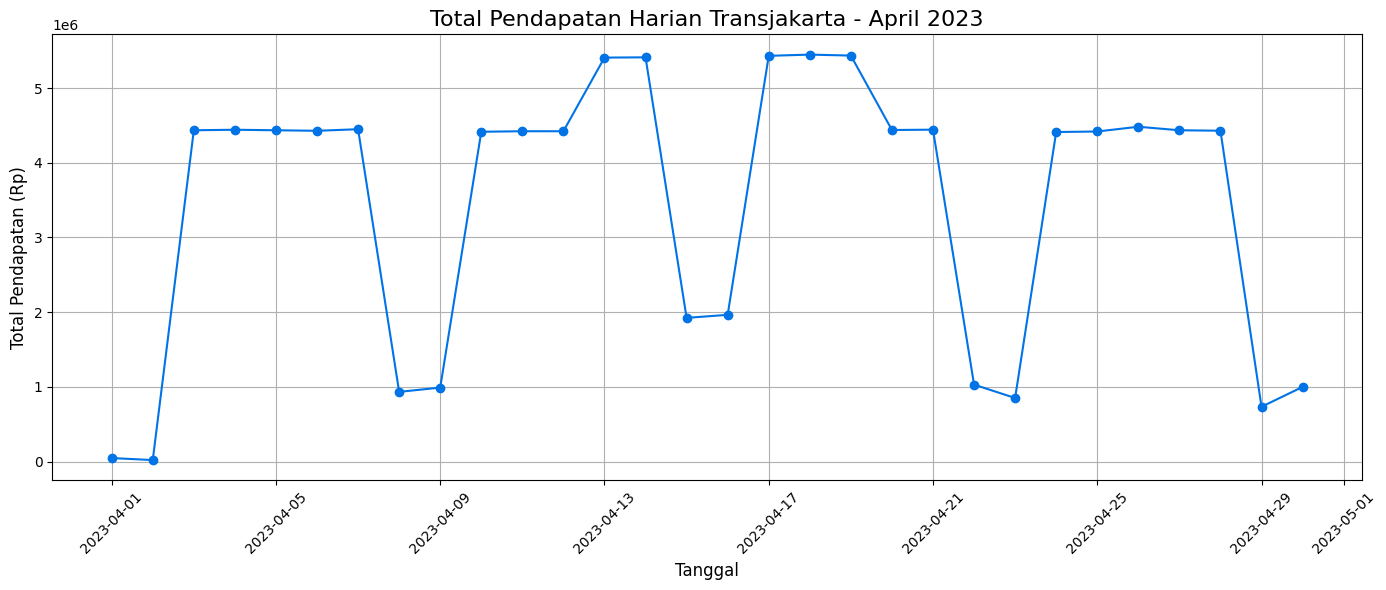

In [131]:
# Konversi OrderDate ke datetime
df_cleansing["OrderDate"] = pd.to_datetime(df_cleansing["OrderDate"], errors='coerce')

# payAmount sebagai revenue
df_cleansing["revenue"] = df_cleansing["payAmount"]

# Hitung total pendapatan harian
daily_revenue = (
    df_cleansing.groupby(df_cleansing["OrderDate"].dt.date)["revenue"]
    .sum()
    .reset_index()
)

daily_revenue.columns = ["date", "total_revenue"]

# VISUALISASI
plt.figure(figsize=(14,6))
plt.plot(daily_revenue["date"], daily_revenue["total_revenue"], marker='o', color="#0073e6")
plt.title("Total Pendapatan Harian Transjakarta - April 2023", fontsize=16)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Total Pendapatan (Rp)", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Summary Total Pendapatan Harian

Pendapatan tertinggi terjadi pada 17–19 April 2023, dengan nilai sekitar Rp 5,4 juta per hari. Ini menandakan hari-hari tersebut merupakan puncak transaksi, kemungkinan karena aktivitas masyarakat yang lebih padat (misal weekday penuh atau libur tertentu).

Pendapatan terendah terjadi pada beberapa hari awal dan akhir bulan, seperti:

1 April: Rp 48.000

2 April: Rp 21.000

29 April: Rp 734.000

30 April: Rp 1.000.000

Hal ini kemungkinan karena hari libur, hari akhir pekan atau lainnya.

Rata-rata pendapatan harian berada di kisaran Rp 4,4 – 5,4 juta, menunjukkan kestabilan penggunaan Transjakarta di hari kerja biasa.

Polanya terlihat fluktuatif, dengan pendapatan rendah pada hari-hari tertentu (libur/akhir pekan) dan tinggi pada hari kerja, yang konsisten dengan perilaku jam sibuk penumpang.

2. Apakah pendapatan berhubungan dengan Rush Hour?


=== Total Pendapatan per Jam ===
    tapInHour     revenue
0           5   8341500.0
1           6  15213500.0
2           7   8018000.0
3           8   8451500.0
4           9   8357000.0
5          10    766000.0
6          11    789000.0
7          12    976000.0
8          13    818500.0
9          14    470500.0
10         15   1076000.0
11         16   8073500.0
12         17  15022000.0
13         18   6747500.0
14         19   7113000.0
15         20   6960000.0
16         21   5931500.0


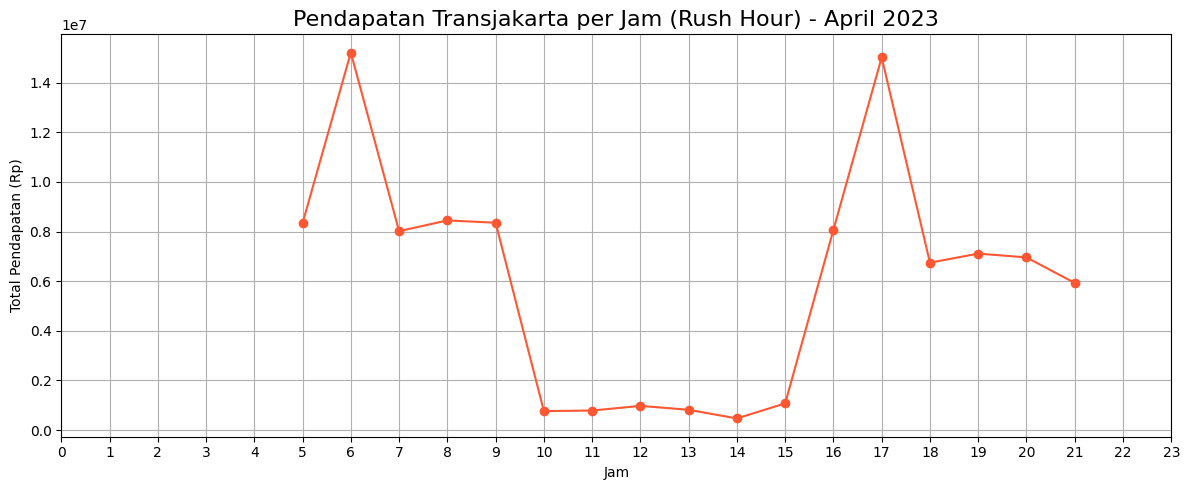


Jam dengan pendapatan tertinggi (indikasi rush hour): 6:00


In [132]:
# payAmount sebagai revenue
df_cleansing["revenue"] = df_cleansing["payAmount"]

# Menambahkan kolom jam dari tapInTime
df_cleansing["tapInHour"] = df_cleansing["tapInTime"].dt.hour

# Hitung total pendapatan per jam
revenue_by_hour = (
    df_cleansing.groupby("tapInHour")["revenue"]
    .sum()
    .reset_index()
)

print("\n=== Total Pendapatan per Jam ===")
print(revenue_by_hour)

# ---------- VISUALISASI ----------
plt.figure(figsize=(12,5))
plt.plot(revenue_by_hour["tapInHour"], revenue_by_hour["revenue"], marker='o', color="#ff5733")
plt.title("Pendapatan Transjakarta per Jam (Rush Hour) - April 2023", fontsize=16)
plt.xlabel("Jam")
plt.ylabel("Total Pendapatan (Rp)")
plt.xticks(range(0,24))
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- IDENTIFIKASI JAM SIBUK ----------
peak_hour = revenue_by_hour.loc[revenue_by_hour["revenue"].idxmax(), "tapInHour"]
print(f"\nJam dengan pendapatan tertinggi (indikasi rush hour): {peak_hour}:00")



Pendapatan tertinggi terjadi pada jam 06.00 am yaitu pada pagi hari yang mana adalah saat masyarakat pergi berangkat bekerja. Selain itu pendapatan tertinggi terjadi pada jam 19.00 malam yang mana adalah jam pulang kerja.


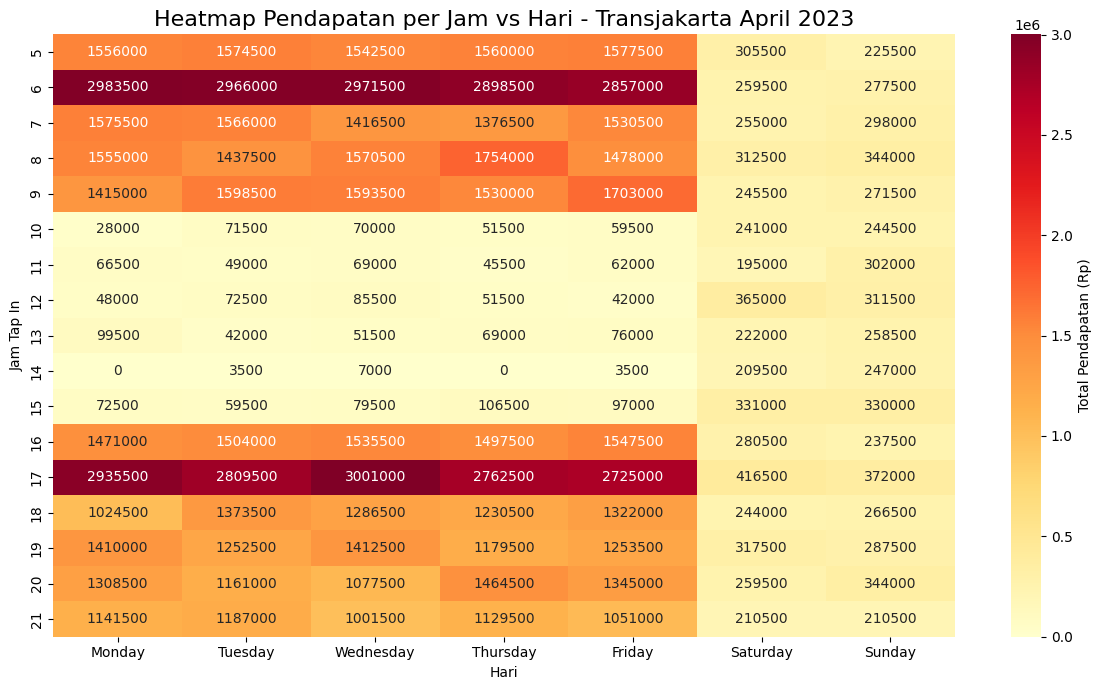

In [133]:

# payAmount sebagai revenue
df_cleansing["revenue"] = df_cleansing["payAmount"]

# Menambahkan kolom hari dan jam
df_cleansing["tapInHour"] = df_cleansing["tapInTime"].dt.hour
df_cleansing["dayName"] = df_cleansing["tapInTime"].dt.day_name()

# Menambahkan kategori dayType: Weekday / Weekend
df_cleansing["dayType"] = df_cleansing["tapInTime"].dt.weekday.map(lambda x: "Weekend" if x >= 5 else "Weekday")

# Pivot table: total revenue per jam per hari
heatmap_data = df_cleansing.pivot_table(
    index="tapInHour",
    columns="dayName",
    values="revenue",
    aggfunc="sum",
    fill_value=0
)

# Urutkan hari sesuai urutan kalender
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
heatmap_data = heatmap_data[day_order]

# ---------- VISUALISASI HEATMAP ----------
plt.figure(figsize=(12,7))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".0f", cbar_kws={'label':'Total Pendapatan (Rp)'})
plt.title("Heatmap Pendapatan per Jam vs Hari - Transjakarta April 2023", fontsize=16)
plt.xlabel("Hari")
plt.ylabel("Jam Tap In")
plt.tight_layout()
plt.show()


Berikut heatmap jam vs hari untuk melihat pola rush hour weekday vs weekend

Penjelasan: 

Sumbu Y → Jam Tap In (0–23).

Sumbu X → Hari dalam seminggu.

Warna (merah tua = tinggi, kuning = rendah) → menunjukkan total pendapatan.

Pada Heatmap ini kita bisa melihat jam sibuk (rush hour): untuk pendapatan tertinggi tercermin di  puncak pagi (06–09) dan sore (16–19) untuk weekdays, sedangkan weekend lebih rendah dan lebih tersebar.

Jadi jawabannya Ya, pendapatan berhubungan dengan rush hour.

3. Rute mana yang memiliki pendapatan tertinggi dan jenis paycard yang digunakan di Bulan April 2023? 

In [134]:

# payAmount sebagai revenue
df_cleansing["revenue"] = df_cleansing["payAmount"]

# Total pendapatan per rute
revenue_by_route = df_cleansing.groupby("corridorName")["revenue"].sum().reset_index()
revenue_by_route = revenue_by_route.sort_values("revenue", ascending=False)

# Ambil rute dengan pendapatan tertinggi
top_route = revenue_by_route.iloc[0]["corridorName"]
top_route_revenue = revenue_by_route.iloc[0]["revenue"]

print(f"Rute dengan pendapatan tertinggi: {top_route} (Rp {top_route_revenue:,.0f})")

# Lihat jenis payCard yang paling banyak dipakai di rute tersebut
paycard_by_top_route = (
    df_cleansing[df_cleansing["corridorName"] == top_route]
    .groupby("payCardBank")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print("\nPendapatan per payCard pada rute tersebut:")
print(paycard_by_top_route)


Rute dengan pendapatan tertinggi: Cibubur - Balai Kota (Rp 11,167,500)

Pendapatan per payCard pada rute tersebut:
  payCardBank    revenue
0         dki  5498000.0
1      emoney  3752000.0
2      brizzi  1215500.0
3       flazz   281500.0
4         bni   216000.0
5      online   204500.0


Penjelasan :

revenue_by_route → menghitung total pendapatan per rute (corridorName).

top_route → rute dengan pendapatan tertinggi.

paycard_by_top_route → melihat distribusi pendapatan berdasarkan payCardBank di rute tersebut.

Insight :

Rute yang paling menguntungkan adalah Cibubur Balai Kota dengan,

PayCard yang paling dominan dipakai untuk rute tersebut adalah JakCard (DKI)

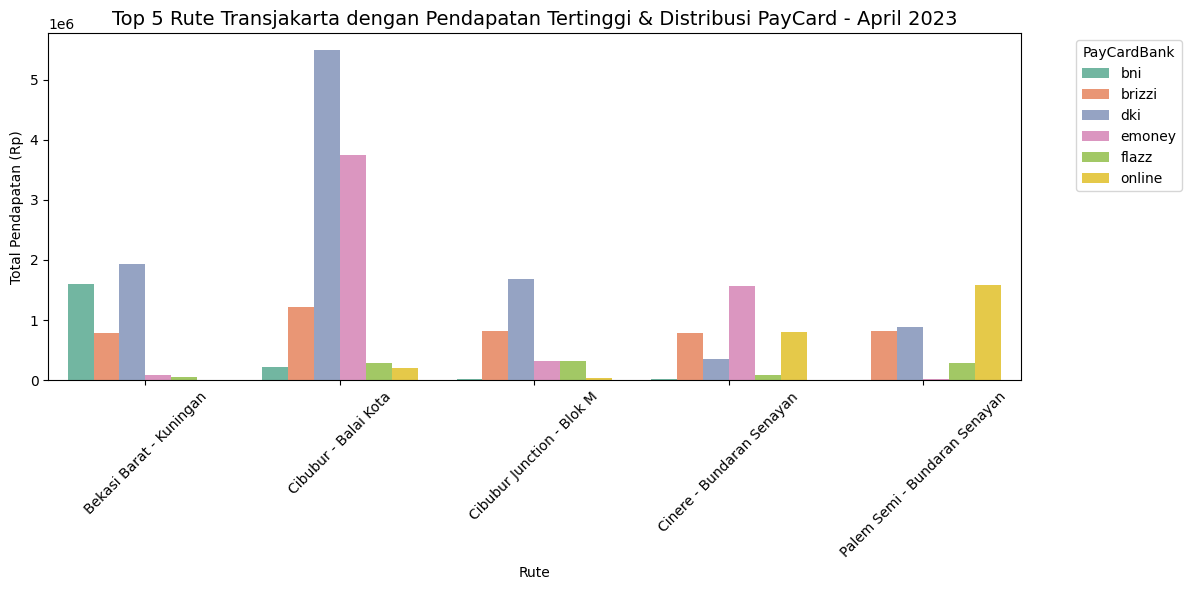

In [135]:

# payAmount sebagai revenue
df_cleansing["revenue"] = df_cleansing["payAmount"]

# Total pendapatan per rute
revenue_by_route = df_cleansing.groupby("corridorName")["revenue"].sum().reset_index()
revenue_by_route = revenue_by_route.sort_values("revenue", ascending=False)

# Ambil top 5 rute
top5_routes = revenue_by_route.head(5)["corridorName"].tolist()

# Filter data untuk top 5 rute
top5_data = df_cleansing[df_cleansing["corridorName"].isin(top5_routes)]

# Hitung total pendapatan per rute per payCard
top5_route_paycard = top5_data.groupby(["corridorName", "payCardBank"])["revenue"].sum().reset_index()

# ---------- VISUALISASI ----------
plt.figure(figsize=(12,6))
sns.barplot(
    data=top5_route_paycard,
    x="corridorName",
    y="revenue",
    hue="payCardBank",
    palette="Set2"
)

plt.title("Top 5 Rute Transjakarta dengan Pendapatan Tertinggi & Distribusi PayCard - April 2023", fontsize=14)
plt.xlabel("Rute")
plt.ylabel("Total Pendapatan (Rp)")
plt.xticks(rotation=45)
plt.legend(title="PayCardBank", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Penjelasan Chart :

Sumbu X → Top 5 rute berdasarkan total pendapatan.

Sumbu Y → Total pendapatan (Rp).

Warna berbeda (hue) → menunjukkan jenis payCard yang digunakan di masing-masing rute.

Rute yang paling banyak pendapatannya adalah Cibubur Balai Kota dengan paycard DKI


=== 10 Halte dengan Penumpang Paling Sedikit ===
                 tapInStopsName  total_penumpang
47                   Awab Dalam                1
2560    Yayasan At Taufiq Gg. R                1
1                ACC Simatupang                1
3                     AKR Tower                1
7                  Adam Malik 1                1
2555                   Yado III                1
1830    Sbr. Jln. B Basmol Raya                1
1831        Sbr. Jln. Bak Air 1                1
1867          Sbr. Jln. Kelinci                1
1870  Sbr. Jln. Kopi Selatan II                1


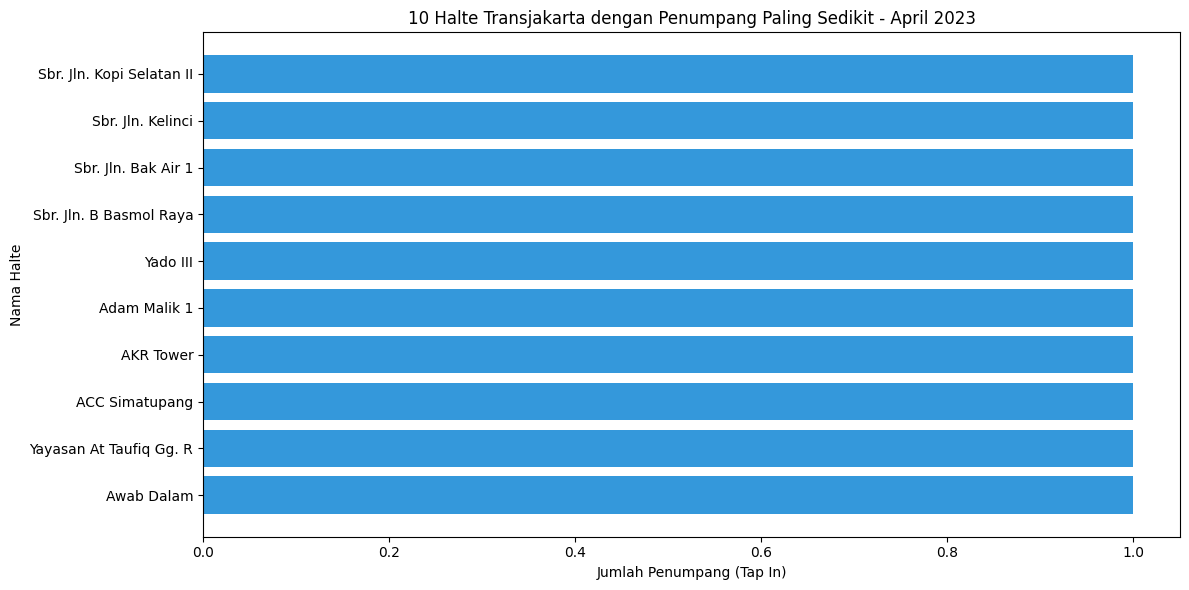

In [136]:
import matplotlib.pyplot as plt

# 1. Menghitung jumlah penumpang per halte
halte_counts = (
    df_cleansing.groupby("tapInStopsName")
    .size()
    .reset_index(name="total_penumpang")
    .sort_values("total_penumpang", ascending=True)
)

# 10 halte dengan penumpang paling sedikit
halte_min = halte_counts.head(10)

print("=== 10 Halte dengan Penumpang Paling Sedikit ===")
print(halte_min)

# 2. VISUALISASI BAR CHART

plt.figure(figsize=(12, 6))
plt.barh(
    halte_min["tapInStopsName"],
    halte_min["total_penumpang"],
    color="#3498db"
)

plt.xlabel("Jumlah Penumpang (Tap In)")
plt.ylabel("Nama Halte")
plt.title("10 Halte Transjakarta dengan Penumpang Paling Sedikit - April 2023")

plt.tight_layout()
plt.show()


# Kesimpulan & Rekomendasi



Setelah melakukan analisis yang menyeluruh, kami mendapatkan beberapa insight penting yang bisa membantu PT Transjakarta untuk meningkatkan kinerja dan efisiensinya:



## Profil Pelanggan


Distribusi Pengguna Berdasarkan Usia

Berdasarkan hasil visualisasi, terlihat bahwa mayoritas pengguna TransJakarta pada tahun 2023 didominasi oleh kelompok usia Adult (dewasa):

| Kategori               | Jumlah Pengguna |
| ---------------------- | --------------- |
| Adult (20–59 tahun)    | 30.089          |
| Teenager (13–19 tahun) | 5.499           |
| Child (<13 tahun)      | 1.530           |
| Elderly (≥60 tahun)    | 782             |


Kesimpulan:

- Adult adalah kelompok terbesar, menunjukkan TransJakarta banyak dimanfaatkan oleh masyarakat usia produktif, pekerja, mahasiswa, dan masyarakat umum dengan mobilitas rutin dan di dominasi oleh perempuan.

- Teenager menempati posisi kedua, terutama pelajar SMA dan mahasiswa awal yang menggunakan TransJakarta untuk berangkat ke sekolah. Yang mana juga didominasi oleh perempuan.

- Child relatif sedikit, karena anak-anak jarang bepergian sendiri.

- Elderly paling sedikit, kemungkinan karena mobilitas terbatas atau preferensi moda transportasi lain.

Secara Payment Behavior Analysis dapat disimpulkan bahwa, untuk pembayaran, penumpang lebih menggemari menggunakan JakCard,


Bank DKI (JakCard) - Paling Populer

| Kategori | Jumlah |
| -------- | ------ |
| Adult    | 15.210 |
| Teenager | 2.337  |
| Child    | 715    |
| Elderly  | 481    |


Bank DKI adalah bank dengan pengguna terbanyak di seluruh kategori umur. Sebagai kartu resmi yang umum dipakai untuk fasilitas publik Jakarta, angka pengguna sangat tinggi terutama untuk Dewasa, Pelajar/Remaja. Bahkan kategori Elderly pun paling banyak dibanding bank lain.

Ini menunjukkan JakCard sangat dominan di jaringan Transjakarta.


# Rekomendasi

1. Meningkatkan Loyalitas Pelanggan dan Menarik Segmen Baru

Strategi: Mempertahankan Pelanggan yang Ada dan Menarik Pelanggan Baru

Analisis: Mempertahankan pelanggan yang sudah ada jauh lebih efisien dan ekonomis dibandingkan biaya untuk memperoleh pelanggan baru.

Tindakan: Membuat program loyalitas berbasis gender:

1. Pelanggan Perempuan (Retention/Retensi):

- Memberi poin setiap kali mereka menggunakan layanan.
- Poin dapat ditukar dengan perjalanan gratis, voucher khusus, atau fasilitas eksklusif.
- Kirim notifikasi personal melalui aplikasi untuk mengingatkan promo dan poin mereka.
- Lounge khusus prioritas di halte besar

2. Pelanggan Lelaki (Acquisition/Peningkatan):

- Buat kampanye promosi menarik bagi calon pelanggan lelaki, misal diskon untuk pendaftaran pertama atau bonus poin awal.
- Tawarkan paket “trial” atau perjalanan gratis pertama untuk mendorong pengalaman awal.
- Gunakan media sosial atau promosi di lokasi strategis untuk menjangkau segmen ini.
- Lounge khusus prioritas di halte besar


Keuntungan (Pros):

- Meningkatkan frekuensi penggunaan oleh pelanggan perempuan yang sudah ada.
- Menarik lebih banyak pelanggan lelaki ke layanan secara bertahap.
- Memperkuat serta membangun hubungan dengan pelanggan melalui penghargaan dan pengalaman personal.

Kelemahan (Con):

- Biaya tambahan untuk pemberian poin, hadiah, dan pengelolaan sistem loyalitas.
- Perlu strategi komunikasi yang tepat agar program efektif pada segmen gender berbeda.

Solusi Teknis:

- Gunakan aplikasi atau platform digital untuk memantau poin, pengeluaran, dan interaksi pelanggan.
- Personalisasi notifikasi dan promo berdasarkan gender dan frekuensi penggunaan, sehingga program lebih relevan dan meningkatkan retensi serta akuisisi.
- Pertahankan dan perluas layanan karena merupakan kartu paling dominan dan digunakan hampir semua kategori umur.
- Karena anak-anak dan keluarga cenderung memanfaatkan e-wallet, bisa dibuat program family-friendly atau fitur kontrol orang tua.



2. Optimalisasi Penggunaan Halte dengan Trafik Tinggi

Evaluasi dan Penyesuaian: Berdasarkan analisis data, beberapa halte memiliki jumlah penumpang yang signifikan. Hal ini menunjukkan bahwa halte tersebut memiliki potensi tinggi untuk meningkatkan pendapatan. Disarankan agar menambahkan fasilitas seperti vending machine/booth snack UMKM untuk mendorong pendapatan

Selain itu juga membagi shift pada jam operasional agar meningkatkan layanan, terutama pada jam sibuk:

> Shift Pagi: 06.00 – 09.00

> Shift Sore: 17.00 – 20.00

- Keuntungan (Pros):

1. Memaksimalkan kapasitas dan pendapatan di halte yang ramai.
2. Meningkatkan sumber daya dan armada yang lebih efisien untuk rute dan halte dengan permintaan tinggi.
3. Menambah pendapatan tanpa menaikkan tarif penumpang.
4. Mendukung UMKM lokal melalui penyewaan kios di halte ramai

- Kelemahan (Cons):

1. Risiko kepadatan yang terlalu tinggi jika kapasitas transportasi tidak memadai maka dari itu armada harus ditingkatkan.
2. Pelanggan bisa mengalami waktu tunggu lebih lama jika tidak ada manajemen kapasitas yang baik.
3. Perlu ruang fisik dan renovasi pada halte tertentu.
4. Volume tinggi berpotensi menambah kepadatan jika tidak dikelola.

3. Strategi Meminimalisir Biaya Operasional pada Halte dengan Trafik Rendah

Evaluasi Ulang Rute dan Frekuensi Bus yang beroperasi pada halte yang minim penumpang

- Solusi:

1. Kurangi jumlah armada yang melewati halte dengan penumpang < 10/hari
2. Atur headway lebih renggang (misalnya dari 10 menit → 25 menit) dan mengubah tipe bus menjadi bus yang muatannya lebih sedikit
3. Terapkan demand-based scheduling

- Dampak:

1. Penghematan bahan bakar
2. Lini operasional tidak terlalu terbebani
3. Tidak mengganggu kenyamanan pengguna di rute utama